<a href="https://colab.research.google.com/github/piotr-malek/my_python_projects/blob/main/spotify_songs_data_cleaning_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I'm working with a dataset of top Spotify songs found on Kaggle. I will do some cleaning and then try to extract some interesting insights, find unexpected correlations, and learn something I didn't know before.

I'll start off by installing the needed libraries and reading the dataset. The default utf-8 encoding didn't work for this dataset so I opted for latin1.

In [ ]:
!pip install opendatasets

import opendatasets as od
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

od.download(
    "https://www.kaggle.com/datasets/arnavvvvv/spotify-music")

Skipping, found downloaded files in "./spotify-music" (use force=True to force download)


In [ ]:
songs = pd.read_csv("spotify-music/Popular_Spotify_Songs.csv", encoding='latin1')
pd.set_option('display.max_columns', None)

In [ ]:
songs.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
songs.describe(include='all')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.0,953.0,953.0,953.0,953.0,953.0,953,953.0,953.0,953,953.0,903,953.0,858,953,953.0,953.0,953.0,953.0,953.0,953.0,953.0
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,NaN,348,NaN,198,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,NaN,0,NaN,0,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,24,NaN,344,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.6,2018.2,6.0,13.9,5200.1,12.0,NaN,67.8,51.9,NaN,2.7,NaN,122.5,NaN,NaN,67.0,51.4,64.3,27.1,1.6,18.2,10.1
std,NaN,NaN,0.9,11.1,3.6,9.2,7897.6,19.6,NaN,86.4,50.6,NaN,6.0,NaN,28.1,NaN,NaN,14.6,23.5,16.6,26.0,8.4,13.7,9.9
min,NaN,NaN,1.0,1930.0,1.0,1.0,31.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,65.0,NaN,NaN,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,NaN,NaN,1.0,2020.0,3.0,6.0,875.0,0.0,NaN,13.0,7.0,NaN,0.0,NaN,100.0,NaN,NaN,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,NaN,NaN,1.0,2022.0,6.0,13.0,2224.0,3.0,NaN,34.0,38.0,NaN,0.0,NaN,121.0,NaN,NaN,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,NaN,NaN,2.0,2022.0,9.0,22.0,5542.0,16.0,NaN,88.0,87.0,NaN,2.0,NaN,140.0,NaN,NaN,78.0,70.0,77.0,43.0,0.0,24.0,11.0


In [ ]:
songs.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

# Data cleaning



I'll do some cleaning first. My main concerns are:
- several columns appear to have wrong data types, e.g. 'streams' should contain only numerical values but it's an object type here while 'in_(platform)_playlist/charts' columns are either int64 or object and I would expect them all to be int64
- some columns contain null values, worth investigating

I tried to assign int type to 'streams' column but got an error - looks like some row has a weird value - "'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'". Let's find it.

In [ ]:
songs[songs['streams'].str.contains('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3')]


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3


The 'streams' value for that song has a lot of data but it doesn't seem like it contains an actual number of streams. Since I can't fix it, i'd better drop this row.

In [ ]:
songs.drop(index=574, inplace=True)

In [ ]:
songs['streams'] = songs['streams'].astype(int)

Now the assignment worked so now I'll check if there are any outliers worth excluding from the analysis.

In [ ]:
songs['streams'].describe()

count          952.0
mean     514137424.9
std      566856949.0
min           2762.0
25%      141636175.0
50%      290530915.0
75%      673869022.0
max     3703895074.0
Name: streams, dtype: float64

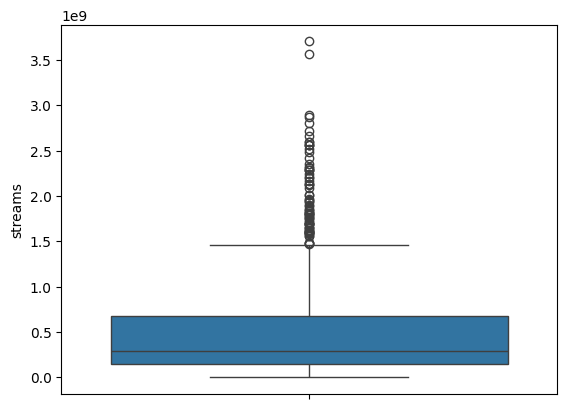

In [ ]:
sns.boxplot(songs['streams'])
plt.show()

Looking at the distribution, there are 2 songs with the highest numbers of streams (3.5B+) but the difference between them and the large group of songs with just below 3B streams isn't that big. I'll have a look at them but there's no point in dropping them.

In [ ]:
songs[songs['streams'] > 3000000000].sort_values('streams', ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,"6,808",7,0,96,C#,Minor,83,93,65,58,0,9,8


Another thing are the low values. Although they didn't appear on the boxplot, there's at least one song with a really low number of streams (2672). I'll have a look at all songs with below 20M streams to see if there are more outliers.


In [ ]:
songs[songs['streams'] < 20000000].sort_values('streams', ascending=False)

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,key_mode,charts_rank,playlists_rank
58,S91,Karol G,1,525,41,16011326,34,115,39,6,216,128,C,Minor,86,42,72,59,0,9,19,2023-07-14,C Minor,0.0,0.0
68,Overdrive,Post Malone,1,410,36,14780425,36,32,31,1,26,140,C#,Major,56,48,73,0,0,35,4,2023-07-14,C# Major,0.0,0.0
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,293,8,11956641,5,2,30,2,66,133,B,Minor,93,68,65,42,0,12,25,2023-06-01,B Minor,0.0,0.0
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,437,31,11599388,17,29,26,3,208,97,C,Major,79,92,89,5,0,6,5,2023-07-13,C Major,0.0,0.0
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,138,4,1365184,13,78,2,0,0,105,G,Major,82,62,74,10,0,33,7,2022-12-22,G Major,0.0,0.0
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,763,26,2762,21,110,21,9,71,162,A#,Major,49,78,64,19,0,11,4,2022-12-09,A# Major,0.0,0.0


The worst result seems to have a really low number of streams. Since the dataset was supposed to contain the top songs on Spotify, this song doesn't seem to belong here.

I also chose to drop the second-to-last song with index 393 because the number of streams is far off from the nearest competitor (the streams for all the other songs go into tens of millions while this one only had 1.3M+). It's a lot of streams but since I plan to rely on 'streams' column a lot when searching for correlations, I feel like this outlier could be more harmful than helpful on this occasion.

So with that said, I'll drop the worst 2 performers.

In [ ]:
songs.drop(index=[123, 393], inplace=True)

Now all is good, at least in the 'streams' column.


Trying to assign an int value to the 'in_deezer_playlists' column results in an error - it seems some values contain an unnecessary comma (e.g. '2,466') which, to Python, makes them strings, not integers. I have another column which may have similar issues so i'd rather create a function to quickly remove commas from both.

In [ ]:
def remove_commas(column):
    for index, value in column.items():
        # check if the value is a string, otherwise ignore
        if isinstance(value, str):
            # If true, remove comma and assign to an index in question
            column.at[index] = value.replace(',', '')

remove_commas(songs['in_deezer_playlists'])
songs['in_deezer_playlists'] = songs['in_deezer_playlists'].astype(int)

Trying to assign an int type to "in_shazam_charts" column I hit a similar error to what I had before. So I'll run the remove_commas function again.

There are also some N/A values in this column. I believe no value means that a song wasn't featured on Shazam charts so I can safely replace N/A with 0.

In [ ]:
remove_commas(songs['in_shazam_charts'])
songs['in_shazam_charts'].fillna(0, inplace=True)
songs['in_shazam_charts'] = songs['in_shazam_charts'].astype(int)

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      952 non-null    int64 
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

As the last step, I want to look into the null values in the 'key' column.

In [ ]:
songs['key'].value_counts(dropna=False)

C#     120
G       96
NaN     95
G#      91
F       89
B       81
D       81
A       74
F#      73
E       62
A#      57
D#      33
Name: key, dtype: int64

In [ ]:
songs[songs['key'].isnull()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,215,745,58,1021,118,NaN,Major,71,65,68,6,0,3,7
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,227,95,24,1173,78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,98,582,2,73,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,33,34,7,184,120,NaN,Major,81,63,68,11,0,11,4
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,145,65,16,1133,144,NaN,Major,77,75,58,52,0,23,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Hold Me Closer,"Elton John, Britney Spears",2,2017,11,10,4967,0,284216603,165,10,177,4,73,126,NaN,Major,67,49,77,11,0,19,11
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,129,11,0,12,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,244585109,102,53,113,12,0,137,NaN,Major,74,71,89,24,61,15,5
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,3,15,0,0,110,NaN,Major,48,15,31,80,22,12,4


I don't know much about music to be fair but my wife does and she claims it's uncommon for pop songs not to have a key. So I started digging using the site called https://tunebat.com/ and I came across a surprising finding - the first 5 and the last 5 songs I printed above all have a C key.

I've only checked a sample of about 10% but I have strong reasons to believe that the dataset has errors and the 95 NaNs are indeed 95 C's. C seems to be [one of the most common keys](https://www.hooktheory.com/cheat-sheet/key-popularity) and right now it doesn't appear in the dataset at all. So I think I won't be wrong to assign 'C' to all NaNs.

In [ ]:
songs['key'].fillna('C', inplace=True)
songs['key'].value_counts(dropna=False)

C#    120
G      96
C      95
G#     91
F      89
B      81
D      81
A      74
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

In [ ]:
songs.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_date           0
key_mode                0
charts_rank             0
playlists_rank          0
dtype: int64

The dataset now contains no NaN values and all data types are fine. Looking at the earlier output of songs.describe() I don't see any abnormalities in any other columns so I think we're ready to proceed.

# Data analysis


## Fixing the 'streams' column

The 'streams' number can be misleasing because songs were released and added to Spotify at very different times while song A released last month already has 10M streams. Looking solely at the 'streams' number song A will appear to be a lot more popular while in fact, it's B that's performing so much better.

I want to calculate how long each song has been on Spotify and use it to get the number of streams per month for each song.

I will start by creating a new field - released_date.

In [ ]:
songs['released_date'] = songs['released_year'] * 10000 + songs['released_month'] * 100 + songs['released_day']
songs['released_date'] = pd.to_datetime(songs['released_date'], format='%Y%m%d')
songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18


And now let's have a look at the dataset sorted by the newly-created column.

In [ ]:
songs.sort_values('released_date', ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
58,S91,Karol G,1,2023,7,14,525,41,16011326,34,115,39,6,216,128,C,Minor,86,42,72,59,0,9,19,2023-07-14
68,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,32,31,1,26,140,C#,Major,56,48,73,0,0,35,4,2023-07-14
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,227,95,24,1173,78,C,Major,44,14,9,96,0,10,3,2023-07-13
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,29,26,3,208,97,C,Major,79,92,89,5,0,6,5,2023-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,A Holly Jolly Christmas - Single Version,Burl Ives,1,1952,1,1,7930,0,395591396,108,120,73,0,0,140,C,Major,67,81,36,64,0,15,3,1952-01-01
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,108,406,0,0,143,D,Major,60,86,32,88,0,34,6,1950-01-01
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964,140,72,251,0,0,139,C#,Major,36,22,15,84,0,11,4,1946-11-01
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396,73,79,123,0,0,96,A,Major,23,19,25,91,0,40,3,1942-01-01


I need to do 2 things:
- determine what to compare the 'released_date" to - today's date or some specific date in the past
- decide what to do with the songs that were released before Spotify was even founded (2006). There aren't many but taking them as they are would lead to some weird mean values for the 'streams' column.

In [ ]:
songs['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1970      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

The newest song in the dataset was released on 2023-07-14. Today is 2024-03-11 so almost 8 months since. Looking at [the dataset page on Kaggle](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data), it appears that the dataset is updated monthly. But checking the several youngest results, it seems obvious that the data must have been last captured long time ago. Examples:
- song with index 0 - 141,381,703 in df, 1,454,055,551 on Spotify as of today
- index 58 - 16,011,326 in df, 210,254,137 on Spotify
- index 68 - 14,780,425 in df, 112,506,273 on Spotify

Based on these 3 examples it seems clear that the data was last captured back in July 2023, maybe August.

I will take August 1st 2023 as a reference point so that there are no 0s in the new field (songs released July 14th will round up to '1 month ago')

In [ ]:
for index, song in songs.iterrows():
    if song['released_year'] < 2010:
        songs.at[index, 'months_on_spotify'] = 170
        # 14 full years + 2 months since the beginning of 2010 = 170 months
    else:
        songs.at[index, 'months_on_spotify'] = round((dt.datetime(2023, 8, 1) - song['released_date']) / np.timedelta64(1, 'M'), 0)


And I will now create the 'monthly_streams' column.

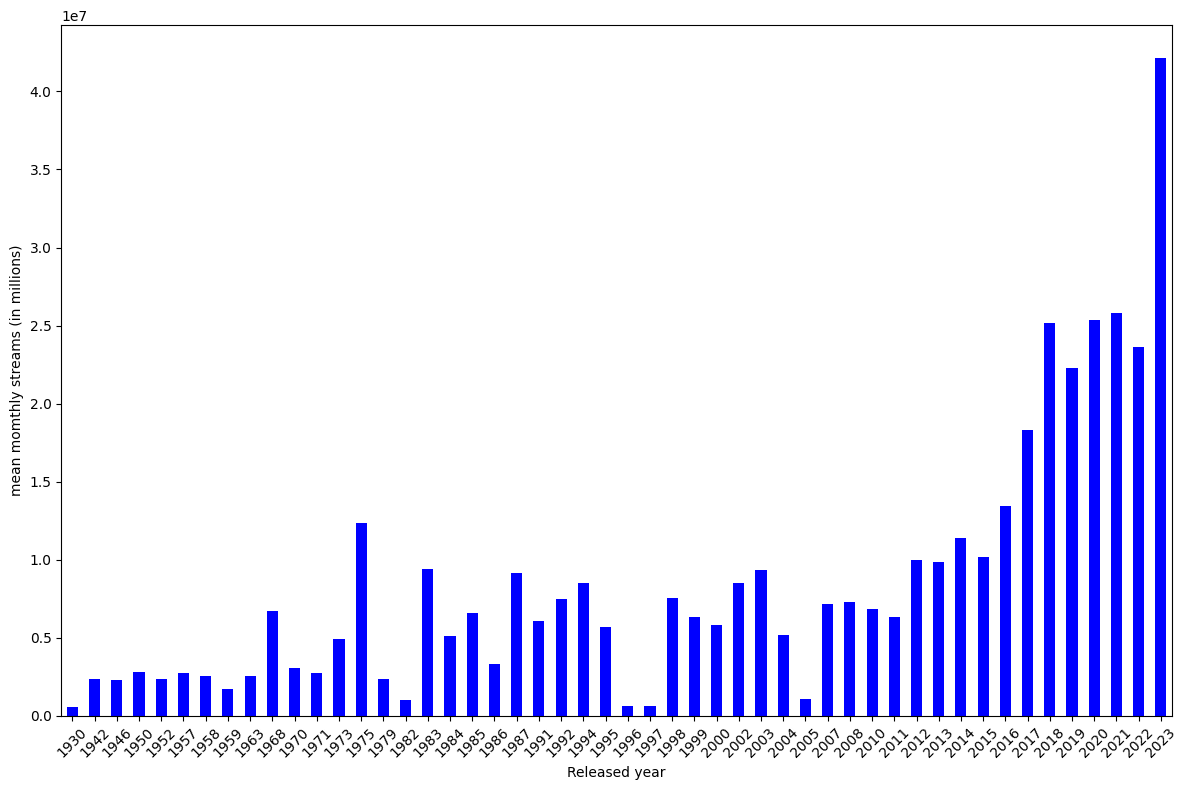

In [ ]:
songs['monthly_streams'] = songs['streams'] / songs['months_on_spotify']
mean_monthly_streams = songs.groupby('released_year')['monthly_streams'].mean()

plt.figure(figsize=(12,8))
mean_monthly_streams.plot(kind='bar', color='blue')
plt.xlabel('Released year')
plt.ylabel('mean momthly streams (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This didn't quite give the expected results. It's clear that the distribution is heavily skewed in favour of the songs released in the last several years. It's understandable - songs tend to be the most popular shortly after they're published and unless something unexpected happens ([hello Stranger Things](https://www.billboard.com/music/chart-beat/kate-bush-running-up-that-hill-stranger-things-spotify-1235079096/)), the popularity falters over the years.

To make this metric reliable, I would need to apply some weights corresponding to different values in the months_on_spotify metric but without any historical data to back one approach over another, it would be pure guessing. So I'm gonna leave it as it is and move on to tackle other analytical problems.

### Disclaimer for the future analysis of 'streams' text

The exercise above led me to believe that 'streams' is not a reliable field to build reliable hypotheses on for 2 reasons:


*   Streams vary heavily not only because of songs popularity but also because of different release dates -> more time they had to gain the streams. This creates a heavy bias towards the songs that have been on Spotify for some years.
*   At the same time, there's no easy way to balance this metric, by creating for example a mean monthly streams column as it also favours the recently released songs. The dataset doesn't have enough data to make this metric more reliable.

I will continue to use 'streams' column to draw conclusion but I'll do it solely for learning purposes - I don't think it would be fair to draw any actual conclusions worth implementing in "real life" based on the data in that column.

## Best time to release a hit

With a very simple exercise, I want to determine on which year, month, and day most songs were released.

In [ ]:
songs['released_year'].value_counts().head()

2022    402
2023    175
2021    119
2020     37
2019     36
Name: released_year, dtype: int64

In [ ]:
songs['released_month'].value_counts().head()

1     133
5     128
3      86
6      86
11     80
Name: released_month, dtype: int64

In [ ]:
songs['released_day'].value_counts().head()

1     94
21    44
13    43
24    40
2     39
Name: released_day, dtype: int64

In [ ]:
songs['released_date'].value_counts().head()

2022-05-06    27
2022-05-13    23
2022-01-07    19
2022-12-09    17
2022-10-21    17
Name: released_date, dtype: int64

It seems that 2022 was the best year, January was the top month and the 1st day of a month was the best day to release the hit songs.

And when you look at all three dimensions at once, two subsequent Fridays in May 2022 gave us the most hits. Interesting!


## Distribution of BPM among top songs

I will now look at how BPM distribution looks like in the dataset. Then I'll aim to split the songs into calmer and more upbeat ones and see how they differ.

In [ ]:
songs['bpm'].value_counts()

120    39
140    31
130    31
92     25
110    23
       ..
182     1
204     1
192     1
163     1
165     1
Name: bpm, Length: 124, dtype: int64

There's a lot of unique values so I'll need to use bins property of plt's histogram to understand that data better.

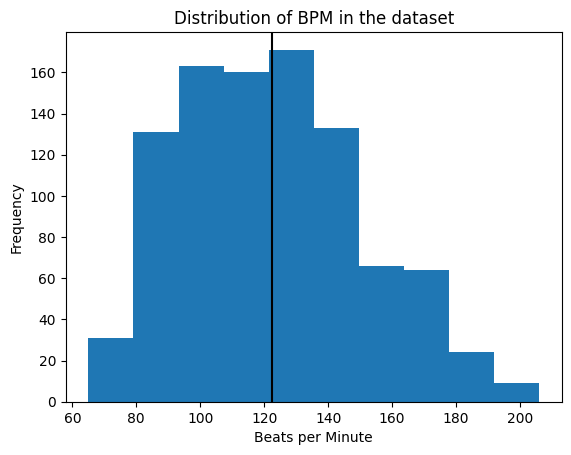

In [ ]:
bpm_mean = songs['bpm'].mean()

plt.hist(songs['bpm'], bins=10)
plt.xlabel('Beats per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of BPM in the dataset')
plt.axvline(bpm_mean, color='black')
plt.show()

10 bins don't tell much except the fact that majority of songs ha between +/- 95 and 135 BMP. Let's try with 20 bins.

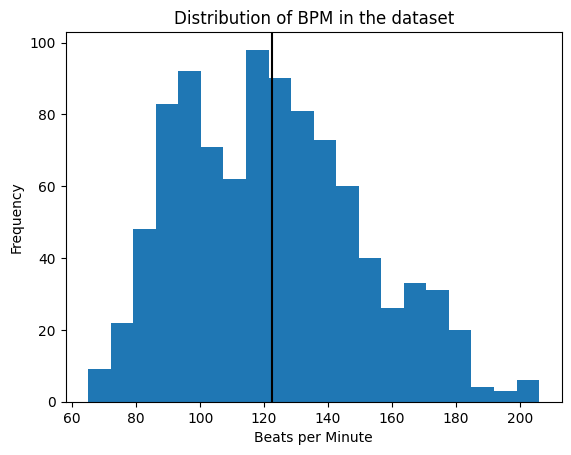

In [ ]:
plt.hist(songs['bpm'], bins=20)
plt.xlabel('Beats per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of BPM in the dataset')
plt.axvline(bpm_mean, color='black')
plt.show()

This is much better. There are 2 peaks - somewhere around 80-90 BPM and in the 120-135 range. There's a visible drop around 110 BPM and this seems like a good spot to break the dataset down into 2 parts - calmer and more upbeat songs.

In [ ]:
calm_songs = songs[songs['bpm'] < 110].copy()
upbeat_songs = songs[songs['bpm'] >= 110].copy()

Let's see the top3 songs in each slice.

In [ ]:
calm_songs.nlargest(3, 'streams')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,months_on_spotify,monthly_streams
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,6808,7,0,96,C#,Minor,83,93,65,58,0,9,8,2017-01-06,79.0,45095492.3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,3595,6,0,98,F#,Minor,82,54,59,69,0,18,10,2019-05-10,51.0,56172385.7
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5,2018-10-09,58.0,48415457.8


In [ ]:
upbeat_songs.nlargest(3, 'streams')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,months_on_spotify,monthly_streams
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,3421,20,0,171,C#,Major,50,38,80,0,0,9,7,2019-11-29,44.0,84179433.5
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,125,1800,0,0,110,C#,Major,50,45,41,75,0,11,3,2018-11-08,57.0,50653365.2
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,C#,Major,59,48,76,4,0,10,5,2021-07-09,25.0,106613756.9


And let's have a look at the mean values for different columns in the datasets

In [ ]:
calm_means = calm_songs.describe().loc['mean']
upbeat_means = upbeat_songs.describe().loc['mean']

# change the default formatting to display each value with up to 2 decimals
pd.options.display.float_format = '{:.2f}'.format

calm_vs_upbeat = pd.concat([calm_means, upbeat_means], axis=1)
calm_vs_upbeat.columns = ['Calm songs', 'Upbeat songs']
calm_vs_upbeat

,Calm songs,Upbeat songs
artist_count,1.58,1.54
released_year,2018.17,2018.35
released_month,6.12,6.00
released_day,14.11,13.85
in_spotify_playlists,5391.14,5095.87
in_spotify_charts,11.05,12.57
streams,533085962.63,503416541.77
in_apple_playlists,62.94,70.65
in_apple_charts,47.61,54.42
in_deezer_playlists,414.50,369.15


Looking at the comparison table there aren't all that many differences between the songs with higher and lower BPM. Here are a few things that differ:

1.   Calmer songs are more likely to make it to playlists on Spotify and Deezer while Upbeat songs are more common guests to Apple Music playlists.
2.   When it comes to charts, upbeat songs take all 4 platforms by a storm!
3.   Calmer songs are slightly more danceable and accoustic and a lot more instrumental
4.   Understandably, upbeat songs display more liveliness, energy but the differences aren't significant.

I'll get back to BPM while analyzing correlations between the fields in the 'songs' dataset.

## Most popular song on Spotify and Apple Music


Here I want to look at what is the absolutely most popular song on both Spotify and Apple Music. Let's see the top5 for each platform first.

In [ ]:
songs.nlargest(5, 'in_spotify_playlists')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,months_on_spotify,monthly_streams
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,1,8215,0,0,116,F#,Minor,79,87,81,4,0,10,4,2013-01-01,127.00,7352878.84
630,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,306,99,5063,2,120,148,C#,Major,35,24,93,0,0,10,8,2003-09-23,170.00,10627162.96
720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,160,6284,1,46,124,D,Major,53,66,78,0,0,16,5,2013-01-01,127.00,15517112.57
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,265,121,12367,4,160,117,C#,Major,52,73,91,0,0,11,7,1991-09-10,170.00,9942311.34
199,Take On Me,a-ha,1,1984,10,19,44927,17,1479115056,34,0,5108,6,0,84,F#,Minor,57,86,90,2,0,9,5,1984-10-19,170.00,8700676.80


In [ ]:
songs.nlargest(5, 'in_apple_playlists')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,months_on_spotify,monthly_streams
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,3421,20,0,171,C#,Major,50,38,80,0,0,9,7,2019-11-29,44.00,84179433.50
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",2,2017,6,2,27705,10,1897517891,537,122,2726,6,0,124,A,Minor,79,59,86,4,0,8,11,2017-06-02,74.00,25642133.66
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,3595,6,0,98,F#,Minor,82,54,59,69,0,18,10,2019-05-10,51.00,56172385.73
407,Don't Start Now,Dua Lipa,1,2019,10,31,27119,0,2303033973,532,77,1535,3,8,124,B,Minor,79,68,79,1,0,10,8,2019-10-31,45.00,51178532.73
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,C#,Major,59,48,76,4,0,10,5,2021-07-09,25.00,106613756.88


And now let's have a look at the combined Top10. Because Spotify songs are featured on many more playlists, it would be unfair to just sum up values in both columns.

Instead I'll calculate the share of playlists that each song sits on for each platform separately and add up the shares for a more reliable measurement.

In [ ]:
sum_spotify_playlists = sum(songs['in_spotify_playlists'])
sum_apple_playlists = sum(songs['in_apple_playlists'])

# display some more decimals now as the values are fractions
pd.options.display.float_format = '{:.6f}'.format

songs['spotify_apple_share_playlists'] = (songs['in_spotify_playlists'] / sum_spotify_playlists) + (songs['in_apple_playlists'] / sum_apple_playlists)
songs.nlargest(10, 'spotify_apple_share_playlists')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,months_on_spotify,monthly_streams,spotify_apple_share_playlists
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,3421,20,0,171,C#,Major,50,38,80,0,0,9,7,2019-11-29,44.000000,84179433.500000,0.019264
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,3631,0,26,104,C#,Major,77,36,63,1,0,36,5,2016-04-04,88.000000,30840026.704545,0.015436
630,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,306,99,5063,2,120,148,C#,Major,35,24,93,0,0,10,8,2003-09-23,170.000000,10627162.964706,0.015231
720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,160,6284,1,46,124,D,Major,53,66,78,0,0,16,5,2013-01-01,127.000000,15517112.574803,0.015150
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,265,121,12367,4,160,117,C#,Major,52,73,91,0,0,11,7,1991-09-10,170.000000,9942311.335294,0.014195
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",2,2017,6,2,27705,10,1897517891,537,122,2726,6,0,124,A,Minor,79,59,86,4,0,8,11,2017-06-02,74.000000,25642133.662162,0.013905
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,1,8215,0,0,116,F#,Minor,79,87,81,4,0,10,4,2013-01-01,127.000000,7352878.842520,0.013822
407,Don't Start Now,Dua Lipa,1,2019,10,31,27119,0,2303033973,532,77,1535,3,8,124,B,Minor,79,68,79,1,0,10,8,2019-10-31,45.000000,51178532.733333,0.013710
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,3595,6,0,98,F#,Minor,82,54,59,69,0,18,10,2019-05-10,51.000000,56172385.725490,0.013202
717,Bohemian Rhapsody - Remastered 2011,Queen,1,1975,10,31,40112,3,2197010679,321,162,5691,8,17,71,C,Minor,41,23,40,27,0,30,5,1975-10-31,170.000000,12923592.229412,0.013067


And repeat that for charts on both platforms.

In [ ]:
sum_spotify_charts = sum(songs['in_spotify_charts'])
sum_apple_charts = sum(songs['in_apple_charts'])

songs['spotify_apple_share_charts'] = (songs['in_spotify_charts'] / sum_spotify_charts) + (songs['in_apple_charts'] / sum_apple_charts)
songs.nlargest(10, 'spotify_apple_share_charts')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,months_on_spotify,monthly_streams,spotify_apple_share_playlists,spotify_apple_share_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14,1.000000,141381703.000000,0.000777,0.018160
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,0,174,F#,Minor,52,66,73,34,0,31,6,2022-03-31,16.000000,157074280.812500,0.010997,0.015361
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,215,745,58,1021,118,C,Major,71,65,68,6,0,3,7,2023-01-12,7.000000,188122245.142857,0.007109,0.014394
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30,1.000000,140003974.000000,0.001737,0.014058
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,227,95,24,1173,78,C,Major,44,14,9,96,0,10,3,2023-07-13,1.000000,30546883.000000,0.001414,0.013676
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23,47.000000,17039166.319149,0.003382,0.012922
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24,2023-06-01,2.000000,91853117.000000,0.001478,0.012257
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,156,182,24,1281,130,D,Minor,51,32,43,83,0,9,3,2023-04-14,4.000000,96892685.500000,0.001951,0.011716
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,98,582,2,73,135,C,Minor,48,44,42,12,2,11,3,2013-01-01,127.000000,10212804.929134,0.002968,0.011592
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9,2023-05-15,3.000000,31739105.000000,0.001150,0.011497


And finally, I can sum up both shares to determine the most popular songs on both platforms, taking into consideration both charts and playlists. Congratz The Weeknd!

In [ ]:
songs['spotify_apple_share'] = songs['spotify_apple_share_playlists'] + songs['spotify_apple_share_charts']
songs.nlargest(10, 'spotify_apple_share')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,months_on_spotify,monthly_streams,spotify_apple_share_playlists,spotify_apple_share_charts,spotify_apple_share
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,3421,20,0,171,C#,Major,50,38,80,0,0,9,7,2019-11-29,44.000000,84179433.500000,0.019264,0.010052,0.029316
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,0,174,F#,Minor,52,66,73,34,0,31,6,2022-03-31,16.000000,157074280.812500,0.010997,0.015361,0.026359
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,215,745,58,1021,118,C,Major,71,65,68,6,0,3,7,2023-01-12,7.000000,188122245.142857,0.007109,0.014394,0.021503
720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,160,6284,1,46,124,D,Major,53,66,78,0,0,16,5,2013-01-01,127.000000,15517112.574803,0.015150,0.006205,0.021355
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,137,2445,1,140,186,G,Major,68,49,59,16,0,13,28,2016-09-21,82.000000,31286947.475610,0.010313,0.009672,0.019985
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5,2018-10-09,58.000000,48415457.758621,0.010622,0.009180,0.019803
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,3631,0,26,104,C#,Major,77,36,63,1,0,36,5,2016-04-04,88.000000,30840026.704545,0.015436,0.004260,0.019696
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,144,707,28,0,81,B,Major,76,53,53,44,0,9,9,2020-06-28,37.000000,69134480.054054,0.010526,0.008416,0.018941
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14,1.000000,141381703.000000,0.000777,0.018160,0.018938
630,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,306,99,5063,2,120,148,C#,Major,35,24,93,0,0,10,8,2003-09-23,170.000000,10627162.964706,0.015231,0.003312,0.018543


## Key & Mode combination that guarantees a success

Next I want to figure out what's the most successful combination of 'key' and 'mode'. Since it's hard to decide what makes a song successful (# of streams? Presence on playlists? Charts?), I've decided to take multiple factors into consideration.

I created frequency tables for each of the 5 criteria I chose to look into, grabbed the rank of each key_mode on such lists and then summed up ranks in all categories. This method helped me determine a clear winner.

The first criteria of success I chose was being on the list of top50 songs in terms of streams.

In [ ]:
songs['key_mode'] = songs['key'] + ' ' + songs['mode']

In [ ]:
top50 = songs.sort_values('streams', ascending=False).head(50).copy()

In [ ]:
top50['key_mode'].value_counts()

C# Major    6
D Major     5
F# Minor    4
E Minor     4
B Major     3
B Minor     3
C# Minor    3
A# Major    3
G# Major    3
A Minor     2
G Major     2
C Major     2
A# Minor    2
E Major     2
C Minor     2
D# Major    1
D# Minor    1
F Major     1
G# Minor    1
Name: key_mode, dtype: int64

And a similar operation to check which key_modes get into the top20.

In [ ]:
top20 = songs.sort_values('streams', ascending=False).head(20).copy()
top20['key_mode'].value_counts()

C# Major    4
F# Minor    2
G# Major    2
A# Major    2
B Minor     2
C# Minor    1
D Major     1
A# Minor    1
G Major     1
B Major     1
A Minor     1
E Minor     1
C Major     1
Name: key_mode, dtype: int64

Next I want to check which key_modes appeared most commonly on charts across all platforms.

I've already worked on a similar task in the previous chapter so some work for Apple and Spotify was already done.

In [ ]:
sum_deezer_charts = sum(songs['in_deezer_charts'])
sum_shazam_charts = sum(songs['in_shazam_charts'])

songs['charts_rank'] = (songs['in_spotify_charts'] / sum_spotify_charts) + (songs['in_apple_charts'] / sum_apple_charts) + (songs['in_deezer_charts'] / sum_deezer_charts) + (songs['in_shazam_charts'] / sum_shazam_charts)
top_on_charts = songs.nlargest(20, 'charts_rank').copy()

And an identical operation for playlists (note: there's no field for Shazam playlists in the dataset)

In [ ]:
sum_deezer_playlists = sum(songs['in_deezer_playlists'])

songs['playlists_rank'] = (songs['in_spotify_playlists'] / sum_spotify_playlists) + (songs['in_apple_playlists'] / sum_apple_playlists) + (songs['in_deezer_playlists'] / sum_deezer_playlists)
top_on_playlists = songs.nlargest(20, 'playlists_rank').copy()

And the last criteria I chose to look at was the presence in the dataset in the first place. After all it features top songs on Spotify, it's gotta mean something!

And here's how I generated a summary table, values in the table below indicating a position on a frequency table for each criterion.

In [ ]:
top_key_mode = pd.concat([
    songs['key_mode'].value_counts().rank(ascending=False),
    top50['key_mode'].value_counts().rank(ascending=False),
    top20['key_mode'].value_counts().rank(ascending=False),
    top_on_playlists['key_mode'].value_counts().rank(ascending=False),
    top_on_charts['key_mode'].value_counts().rank(ascending=False)],
                         axis=1)
top_key_mode.columns = ['all_songs', 'top50', 'top20', 'playlists', 'charts']

# display only 1 decimal
pd.options.display.float_format = '{:.1f}'.format

# add a column to sum up the ranks
top_key_mode['total'] = top_key_mode.sum(axis=1)

# I added a column to count how many frequency tables a key_mode appears in and then sorted by that column, then by totals.
# Not having such a column would, for example, rank a key_mode with values (1, 1, 2, 1, 1) lower than one with (NaN, NaN, 5, NaN, NaN).
top_key_mode['non_NaN_count'] = top_key_mode[['all_songs', 'top50', 'top20', 'playlists', 'charts']].count(axis=1)
top_key_mode.sort_values(by = ['non_NaN_count', 'total'], ascending = [False, True], inplace=True)

# But don't want to display that 'non_NaN_count' column as it's only used for sorting
top_key_mode[['all_songs','top50', 'top20', 'playlists', 'charts', 'total']]

,all_songs,top50,top20,playlists,charts,total
C# Major,2.0,1.0,1.0,1.0,2.0,7.0
D Major,3.5,2.0,9.5,3.0,9.0,27.0
F# Minor,11.0,3.5,3.5,2.0,9.0,29.0
C Major,1.0,12.5,9.5,8.5,1.0,32.5
C# Minor,6.0,7.0,9.5,8.5,9.0,40.0
B Major,13.0,7.0,9.5,8.5,3.5,41.5
G Major,3.5,12.5,9.5,8.5,9.0,43.0
G# Major,5.0,7.0,3.5,8.5,NaN,24.0
B Minor,7.0,7.0,3.5,NaN,9.0,26.5
F Major,10.0,17.5,NaN,8.5,9.0,45.0


C# Major is a clear winner!

## How number of artists impacts the song's performance

Next I want to check whether a number of artists that performed a given song had any influence on how a song performed.

I'll be looking at correlations between different columns so before I get started, I want to clean up the dataset of the columns that I added throughout this exercise and that I think won't be needed any longer.

In [ ]:
songs.drop(['released_year', 'released_month', 'released_day', 'months_on_spotify', 'monthly_streams', 'spotify_apple_share_playlists', 'spotify_apple_share_charts', 'spotify_apple_share'], axis=1, inplace=True)
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   in_spotify_playlists  952 non-null    int64         
 4   in_spotify_charts     952 non-null    int64         
 5   streams               952 non-null    int64         
 6   in_apple_playlists    952 non-null    int64         
 7   in_apple_charts       952 non-null    int64         
 8   in_deezer_playlists   952 non-null    int64         
 9   in_deezer_charts      952 non-null    int64         
 10  in_shazam_charts      952 non-null    int64         
 11  bpm                   952 non-null    int64         
 12  key                   952 non-null    object        
 13  mode                

In [ ]:
songs['artist_count'].value_counts()

1    586
2    254
3     85
4     15
5      5
6      3
8      2
7      2
Name: artist_count, dtype: int64

Most songs were recorded by a single artist with plenty also performed by duos. Starting with 3 the number of songs significantly drops and analyzing each artist count separately wouldn't make for a reliable indicator. So I'll look at songs with 1 artist, 2 artists, and 3+ artists.

In [ ]:
artists_compared = pd.concat([
    songs[songs['artist_count'] == 1].describe().loc['mean'],
    songs[songs['artist_count'] == 2].describe().loc['mean'],
    songs[songs['artist_count'] >= 3].describe().loc['mean']],
                             axis=1)
artists_compared.columns = ['1 artist', '2 artists', '3+ artists']
artists_compared

,1 artist,2 artists,3+ artists
artist_count,1.0,2.0,3.5
in_spotify_playlists,5807.6,4415.2,3822.6
in_spotify_charts,11.9,12.8,11.1
streams,568211662.2,462480785.8,348363168.7
in_apple_playlists,70.0,67.4,57.6
in_apple_charts,53.8,54.8,36.2
in_deezer_playlists,449.8,292.9,259.2
in_deezer_charts,2.5,3.2,2.2
in_shazam_charts,56.2,60.8,51.6
bpm,123.6,121.8,118.8


Looking at means there are some quick conclusions I can make:


*   Songs with fewer artists have more streams and more frequently appear on playlists.
*   Interestingly, duos seem to top the charts more often on every platform.
*   Unsurprisingly, songs with 2 or more artists have significantly higher danceability, energy, liveness, and speechiness.


<ipython-input-182-aa5b384c6a88>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  artists_corr_pearson = songs.corr(method='pearson')['artist_count'].drop('artist_count')


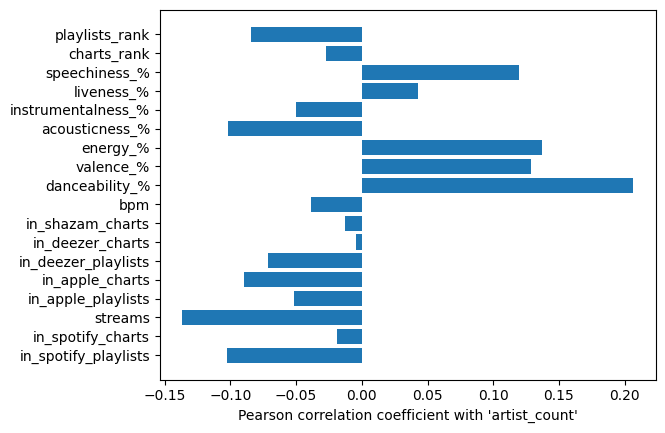

In [ ]:
# calculating pearson's correlations for the 'artist_count' column and immediately dropping this column so it doesn't appear in the result
artists_corr_pearson = songs.corr(method='pearson')['artist_count'].drop('artist_count')
plt.barh(artists_corr_pearson.index, artists_corr_pearson.values)
plt.xlabel("Pearson correlation coefficient with 'artist_count'")
plt.show()

I also looked at how values in other columns correlate with 'artist_count'. There aren't any strong correlations in the dataset but some milder correlations seem to confirm what the means told us above.

What's interesting is that virtually all "performance" metrics (streams, chart/playlist-related columns) seem to indicate that the fewer artists, the better performance. But to be fair, the chart-related fields have very tiny correlation coefficient which seems to coincide with the earlier discovery that duos perform better on charts.

<ipython-input-183-6fccdcaf7f7e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  artists_corr_spearman = songs.corr(method='spearman')['artist_count'].drop('artist_count')


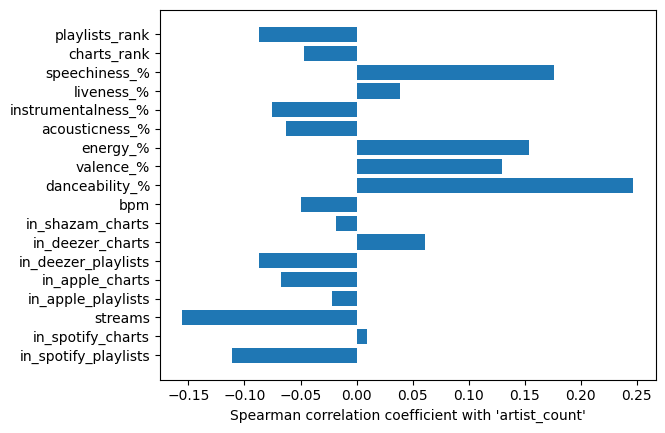

In [ ]:
artists_corr_spearman = songs.corr(method='spearman')['artist_count'].drop('artist_count')
plt.barh(artists_corr_spearman.index, artists_corr_spearman.values)
plt.xlabel("Spearman correlation coefficient with 'artist_count'")
plt.show()

Spearman correlation is often a more reliable indiciator than Pearsons when correlations are weak and a dataset is small. Such is the case here so I thought I'd build the above chart to have one more look.

The results aren't much different but streams and the 4 songs characterists I discussed above seem to correlate even stronger with artist_count. The chart performance seem to be more ambigious, with deezer charts even favouring larger artist counts.

## What are the correlations between songs' characteristics

And now let's have one final look at the correlations between the columns in the dataset. I'm using Spearman correlation coefficient for the reasons stated above. I want to measure how the 3 "performance" metrics coincide with various song characterists found in the dataset.

In [ ]:
performance_metrics = ['streams', 'charts_rank', 'playlists_rank']
song_characteristics = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

songs_corr = songs[song_characteristics + performance_metrics].corr(method='spearman').loc[song_characteristics, performance_metrics]
songs_corr

,streams,charts_rank,playlists_rank
bpm,0.0,0.0,0.0
danceability_%,-0.1,0.0,-0.1
valence_%,-0.0,0.1,-0.0
energy_%,-0.0,0.1,0.0
acousticness_%,-0.1,-0.1,-0.1
instrumentalness_%,-0.0,-0.0,0.0
liveness_%,-0.1,-0.0,-0.0
speechiness_%,-0.1,-0.1,-0.1


The correlations aren't particularly strong. Some things worth noting:


*   Speechiness has the highest overall impact on all 3 indicators so if there's one learning from this experiment then it's that stronger presence of musical elements in a song will get your song further.
*   High energy songs perform better on charts
*   Songs with more acoustic elements perform worse, on playlists in particular


And now let's have a look at the correlations between song characteristics.


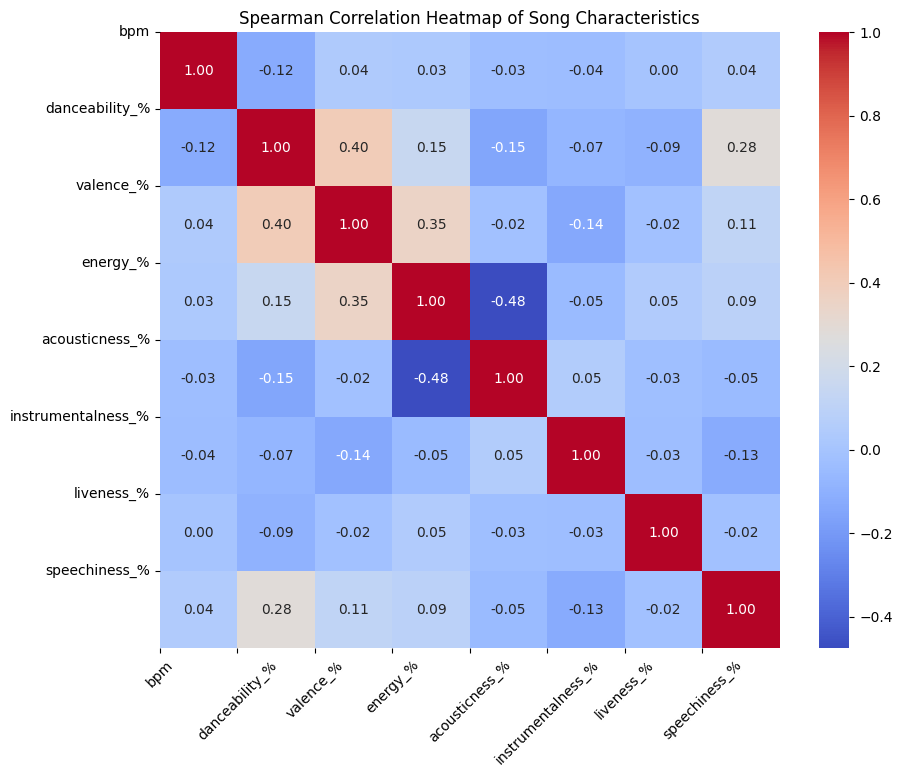

In [ ]:
corr_matrix = songs[song_characteristics].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})

plt.xticks(ticks=range(len(song_characteristics)), labels=song_characteristics, rotation=45)
plt.yticks(ticks=range(len(song_characteristics)), labels=song_characteristics, rotation=0)
plt.title('Spearman Correlation Heatmap of Song Characteristics')
plt.show()


There's one pretty strong negative correlation visible here between the acousticness of a song and its energy - a pretty obvious one.

What's more, danceability and energy correlate positively with songs' valence (positiveness). This could have been expected - energetic songs that people dance to tend to be positive too.

Danceability correlates also in a positive way with speechiness. Other than that, nothing much worth discussing further.

Thanks so much for your time and if there's any feedback you'd like to share, [I'm all ears](https://github.com/piotr-malek).